In [17]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

In [19]:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])

C:\Users\salman\AppData\Local\Temp\ipykernel_14264\3201875092.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],


In [20]:
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [21]:
model.check_model()

True

In [22]:
from pgmpy.inference import VariableElimination

In [7]:
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


In [8]:
pos = nx.circular_layout(model)
nx.draw(model, with_labels=True,pos=pos)
plt.savefig('model.png')
plt.close()

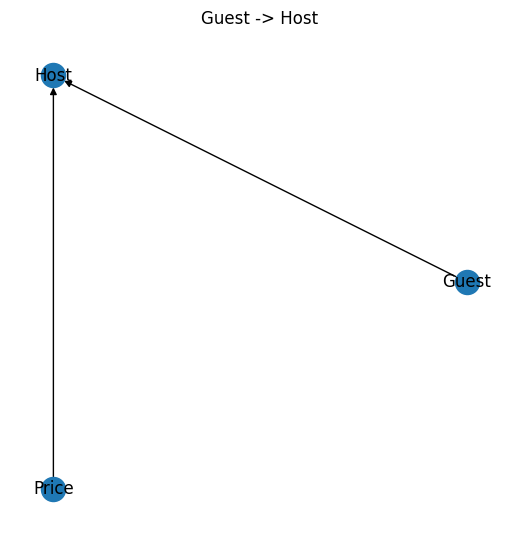

In [24]:
plt.figure(figsize=(5, 5))
nx.draw(model, with_labels=True,pos=pos)
plt.show()